# PyMMM: Python Mother Machine Manager

In [1]:
from PyMMM_main.Experiment.experiment import * 
# from Experiment2.experiment import * 

In [2]:
os.getcwd()

'd:\\PRISM'

The first thing to do is to define your experiment's directory, and instantite an `Experiment` object using that directory.
Let's also print the experiment's properties

In [3]:

import os
# os.environ["JOBLIB_TEMP_FOLDER"] = "C:/temp"
# os.makedirs("C:/temp", exist_ok=True)
os.makedirs("D:/temp", exist_ok=True)
os.environ["JOBLIB_TEMP_FOLDER"] = "D:/temp"


In [4]:
directory = os.getcwd()
my_experiment = Experiment(
    directory,  
    save_filetype="png"
)
print(my_experiment)


            Experiment name: PRISM
            Channels: ['BFP', 'PC', 'RFP']
            Timepoints: 181
            FOVs: 12
            Registered: True
        


d:\PRISM\PyMMM_main\Experiment\experiment.py:889: UserWarning: No mean_amount attribute set. Taking image means over all timepoints. Very slow!
  warnings.warn("No mean_amount attribute set. Taking image means over all timepoints. Very slow!")


Here, we can choose the times and FOVs to take forward for registration

In [5]:
my_experiment.set_analysis_times(0, 126)
#my_experiment.discard_FOVs([f"xy0{str(x).zfill(2)}" for x in range(30, 37)]) 

In [6]:
my_experiment.FOVs

['xy000',
 'xy001',
 'xy002',
 'xy003',
 'xy004',
 'xy005',
 'xy006',
 'xy007',
 'xy008',
 'xy009',
 'xy010',
 'xy011']

In [7]:
# # Manually set the channel order based on the acquisition order in the metadata
# my_experiment.channels = ['PC', 'CFP', 'mVenus', 'mCherry3', 'Dapi']

### Let's now ensure the quality of the data

We're going to register the images to minimise the effects of stage drift.

* First we will set the experiment's registration channel, here we are using `"PC"` for phase contrast.

In [8]:
my_experiment.registration_channel = "PC"
# my_experiment.registration_channel = "BF"

Next we will do two things:
* The first is to calculate mean images for the experiment. These are average images which will be used for image registration
* By default, PyMMM takes an average over the last 15 images of the experiment, as the experiment's stage drift has likely stopped by then.
* We can also rotate the mean image if the experiment was not properly aligned. This will rotate the mean images, and all other images will be registered against them, rotating them in the process.
* Let's just check our experiment without the rotation argument.

In [9]:
my_experiment.mean_amount = 200

  0%|          | 0/12 [00:00<?, ?it/s]

Mean images for 12 FOVs with rotation of 0 deg calculated, use the mean_images method to return a dict of mean images


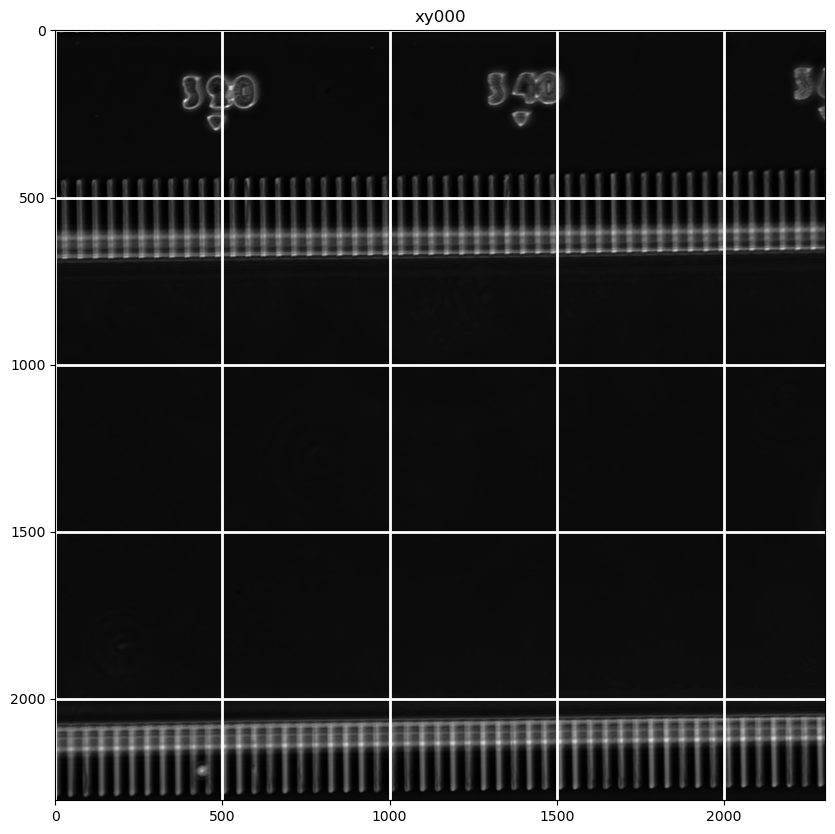

In [11]:
my_experiment.get_mean_images(plot = True)

If there's some rotation in our experiment, rotate the images and recalculate the mean images. The rotated angle should be indicated in the output of the previous cell.

  0%|          | 0/12 [00:00<?, ?it/s]

Mean images for 12 FOVs with rotation of -0.7 deg calculated, use the mean_images method to return a dict of mean images


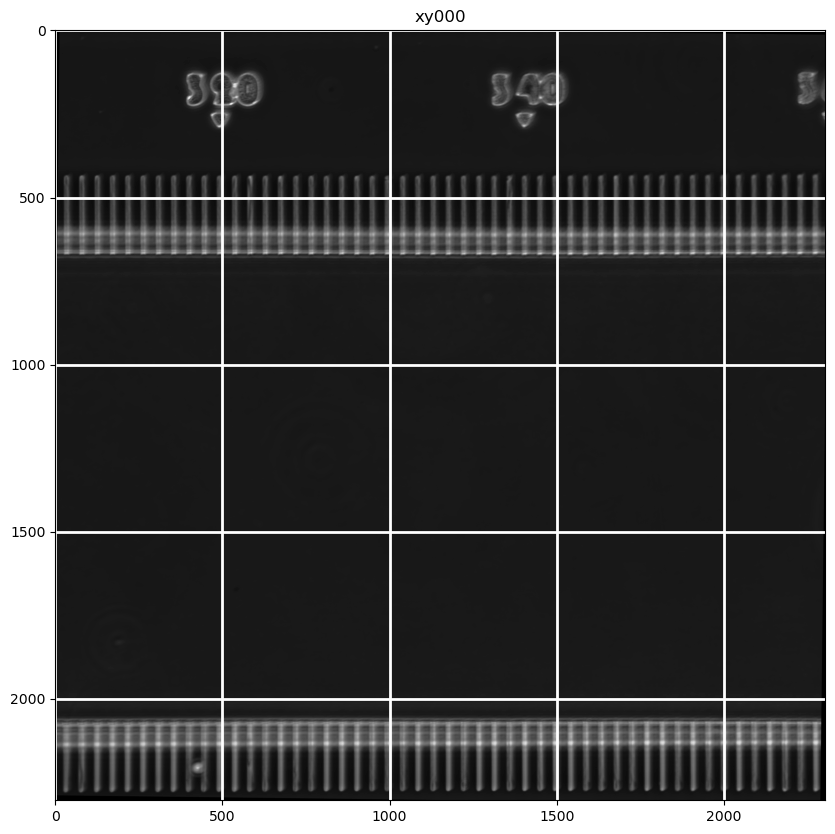

In [12]:
my_experiment.get_mean_images(rotation = -0.7, plot = True)

In [13]:
my_experiment.rotation

-0.7

That's looking much better.
This function below call aligns all images in the experiment to a specific timepoint (5th) using the registration channel, applying the alignment only within the specified pixel limits.
* We can now register the images. We only need to do this once, so we can check whether the experiment has already been registered with the `is_registered` property.
* Here we check if an experiment is registered, and not, we register it with all of our CPU cores.
* There is also a `force` argument, which if set to `True` will overwrite any previous registered images.

In [14]:
if my_experiment.is_registered:
    print("Experiment is already registered. Skip registration step.")
else:
    print("Experiment is not registered, please run the cell below")


Experiment is already registered. Skip registration step.


In [15]:
my_experiment.registered_dir

'd:\\PRISM\\registered\\'

In [16]:
my_experiment.FOVs

['xy000',
 'xy001',
 'xy002',
 'xy003',
 'xy004',
 'xy005',
 'xy006',
 'xy007',
 'xy008',
 'xy009',
 'xy010',
 'xy011']

In [17]:
# Specify the FOVs you want to register
# Assuming FOVs are named like 'xy000', 'xy001', ..., 'xy010'
# selected_FOVs = [f'xy{str(i).zfill(3)}' for i in range(21, 26)]
selected_FOVs = [f'xy{str(i).zfill(3)}' for i in [0, 1, 2, 3, 4, 5]]
my_experiment.FOVs = [fov for fov in my_experiment.FOVs if fov in selected_FOVs]

my_experiment.FOVs = selected_FOVs


# # Now run the registration only on these FOVs
my_experiment.register_experiment(force=True, mode=0, sum=False, n_jobs=-1, y_lims=(0,1000), x_lims=(0, -1))


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/126 [00:00<?, ?it/s]

  0%|          | 0/126 [00:00<?, ?it/s]

  0%|          | 0/126 [00:00<?, ?it/s]

  0%|          | 0/126 [00:00<?, ?it/s]

  0%|          | 0/126 [00:00<?, ?it/s]

  0%|          | 0/126 [00:00<?, ?it/s]

In [17]:
# takes like 30 mins, register all
# my_experiment.register_experiment(force=True, mode=0, sum=False, n_jobs = -1,  y_lims = (400,1000), x_lims = (0,-1))
# # my_experiment.register_experiment(force=True, mode=0, sum=False, n_jobs = -1,  y_lims = (250,900), x_lims = (0,-1))

### Let's now find the trenches

There are several methods you can use to explore the experiment:

Channels: ['BFP', 'GFP', 'PC', 'RFP']

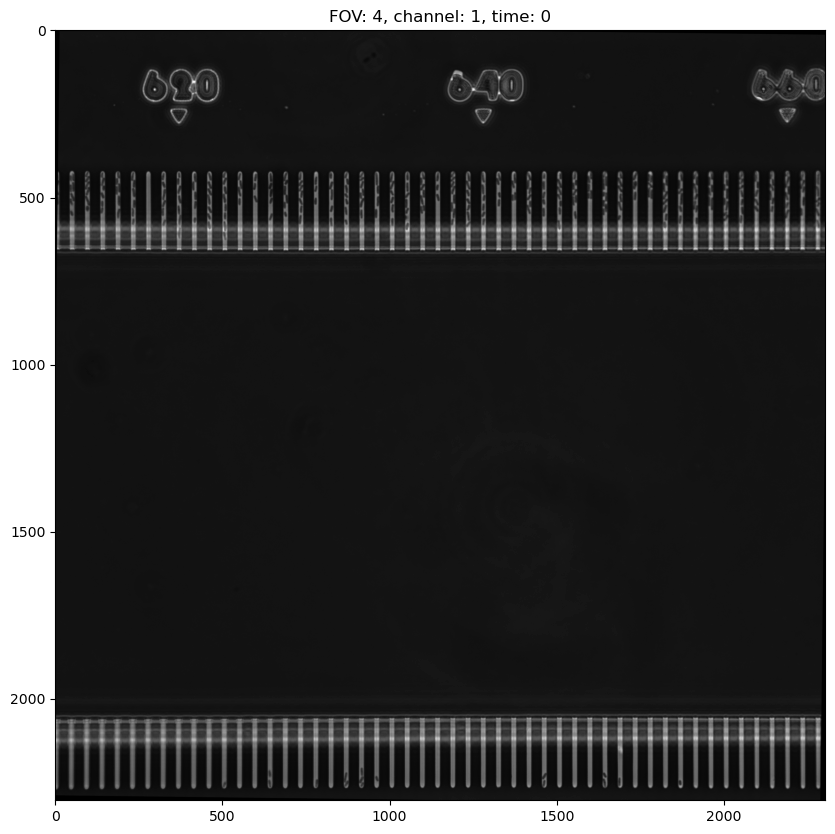

(2304, 2304)

In [18]:
#Indexing using numbers
an_image = my_experiment.get_image(FOV = 4, channel = 1, time = 0, plot = True, registered = True)
an_image.shape
#Indexing using channel and FOV names
#an_image = my_experiment.get_image(FOV = "A23", channel = "Green", time = 1, plot = True, registered = True)

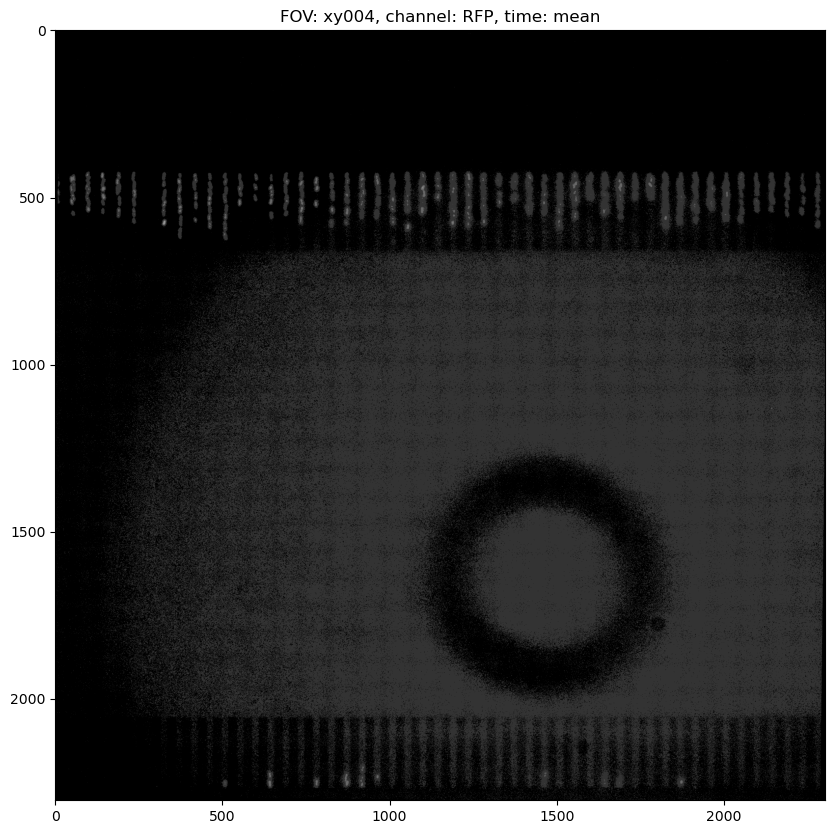

In [22]:
#Getting the mean of a timestack for a particular FOV
a_mean_image = my_experiment.get_mean_of_timestack(4, 2, plot=True)

In [19]:
mean_timestacks = [my_experiment.get_mean_of_timestack(FOV, "PC", ) for FOV in my_experiment.FOVs]
#mean_timestacks = [my_experiment.get_mean_of_timestack(FOV, "BF", ) for FOV in my_experiment.FOVs]

### If there are two rows of trenches in the image
We need to crop one row at a time.


In [20]:
# if there are two rows of trenches, crop each row. if there is only one row, can set to None
# x_crop = (200, 2000)
y_crop = (0,1000)

### Finding the x limits

In [21]:
my_experiment.registration_channel

'PC'

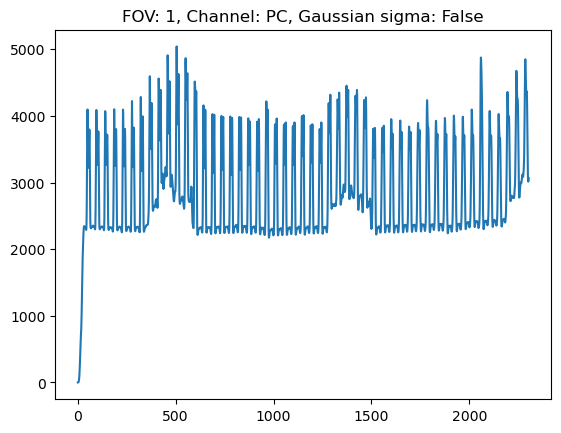

In [22]:
# Getting the mean of the timestack over the x direction
a_t_x_mean = my_experiment.mean_t_x(1, my_experiment.registration_channel, y_crop=y_crop, plot=True)


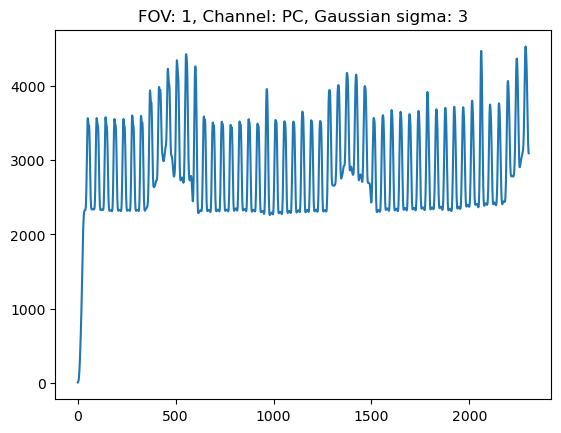

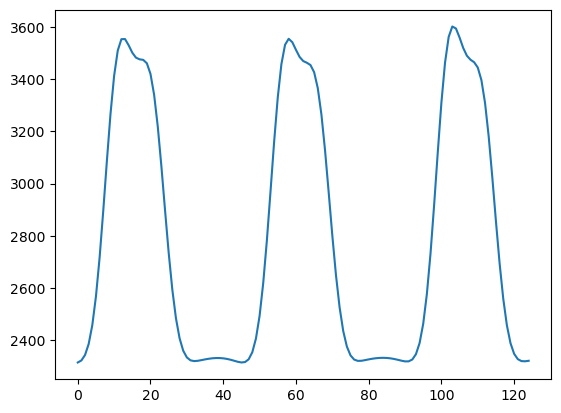

In [23]:
# Adding a gaussian blurring using the sigma argument
# This sigma should be similar to the size of trench
sigma = 3

# Use a convolution filter if gaussian blurring isn't working well
a_t_x_mean = my_experiment.mean_t_x(1, my_experiment.registration_channel, sigma=sigma, y_crop=y_crop, plot=True)
f = deepcopy(a_t_x_mean[175:300])
plt.plot(f)


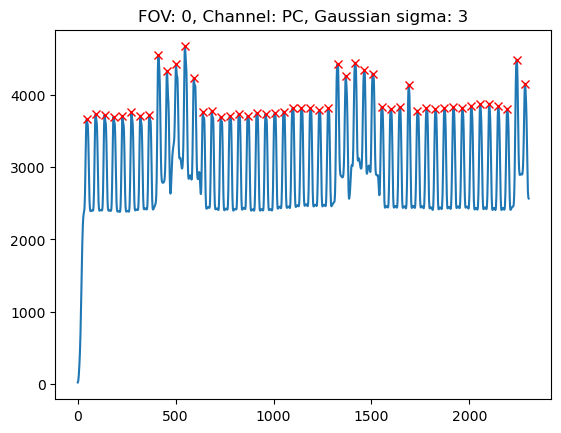

(2304, 2304)


In [27]:
# Now finding trench peaks for a particular FOV, giving a distance argument, and using our sigma value from before

# When detecting peaks, the algorithm will ensure that each identified peak is at least distance=100 pixels away from the next peak.
# By setting prominence=10, the algorithm will only consider peaks that are at least 10 units taller than their surrounding area.
distance = 25
prominence = 15

# if you want to use convolutional filter, set conv_filter to f. This is often done for MM with side trenches for phage experiments.
peaks = my_experiment.find_trench_peaks(0, 
                                        my_experiment.registration_channel, 
                                        sigma=sigma, 
                                        distance=distance, 
                                        prominence=prominence, 
                                        conv_filter=None,
                                        y_crop=y_crop, 
                                        plot=True)
print(my_experiment.dims)


We've found good values for `sigma` and `distance`.
Let's now call `find_all_trench_x_positions` on the phase contrast channel to identify all the x limits of the trenches in every FOV

In [28]:
trench_x_positions = my_experiment.find_all_trench_x_positions(my_experiment.registration_channel, 
                                                               sigma=sigma, 
                                                               distance=distance, 
                                                               prominence=prominence, 
                                                               conv_filter=None, 
                                                               trench_width=30,
                                                               y_crop=y_crop, 
                                                               plot=False, 
                                                               plot_save=True)

# shrink_scale = 2.0: The width of the trench is set to be half of the average distance between the detected peaks.
# shrink_scale = 4.0: The width is one-quarter of the distance between peaks, effectively making the trenches narrower.
# shrink_scale=2,


Using the trench width specified by trench_width. Please ensure this parameter is an appropriate integer


### Discard any bad trenches

In [ ]:
# my_experiment.discard_trenches(list(range(943, 947)))

### Finding the y limits
So we've successfully found the x limits of the trenches. Let's now find the y limits.
Change sigma and height parameters until you see cross (x) in where you want.

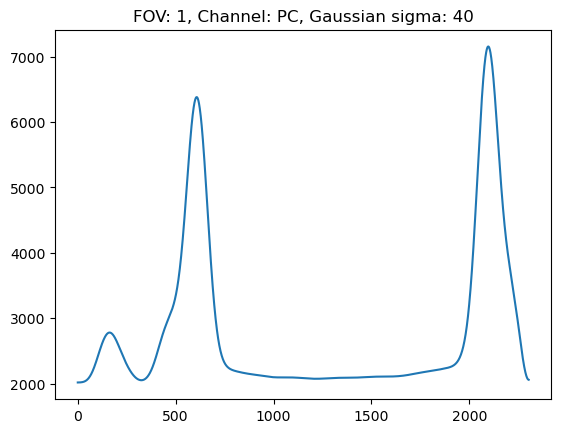

In [29]:
#Adding a gaussian blurring using the sigma argument
sigma = 40
a_t_y_mean = my_experiment.mean_t_y(1, my_experiment.registration_channel, sigma = sigma, plot = True)

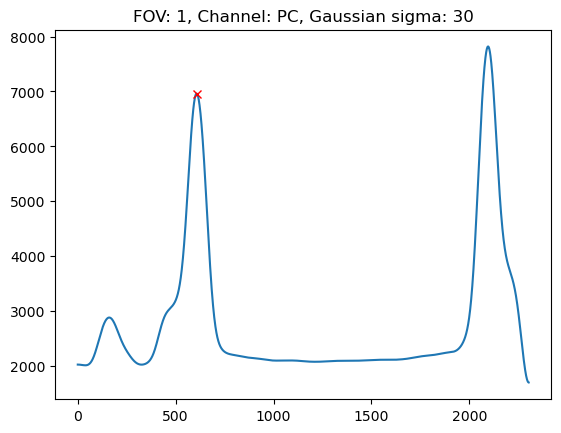

In [31]:
#Adding a gaussian blurring using the sigma argument
sigma = 30
height = 5000
distance = my_experiment.dims[0]
a_t_y_mean, y_peak = my_experiment.find_lane_peaks(1, sigma = sigma, distance = distance, height=height, plot = True, y_crop=y_crop)

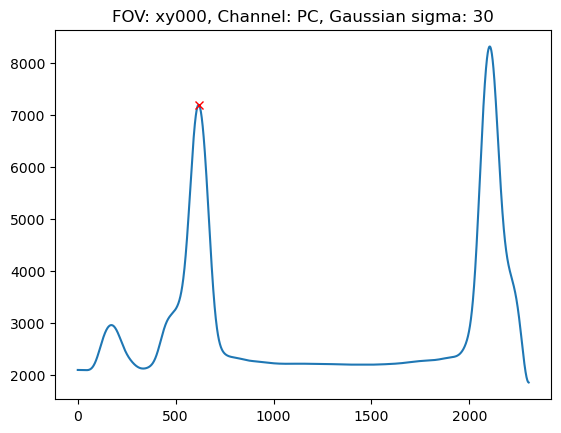

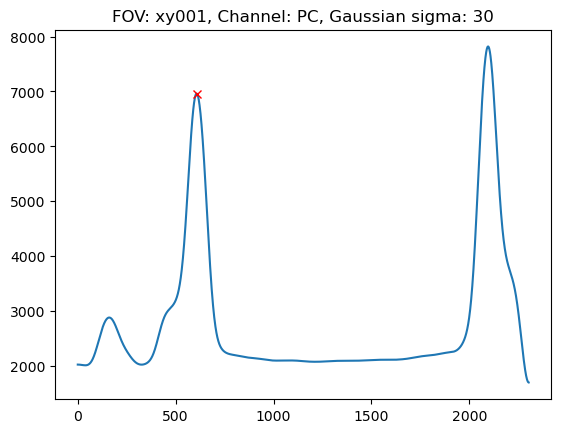

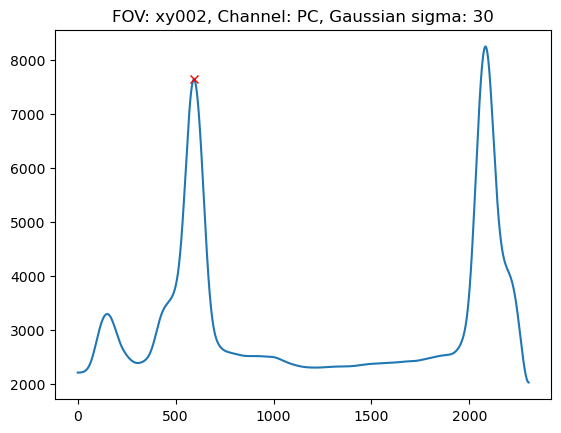

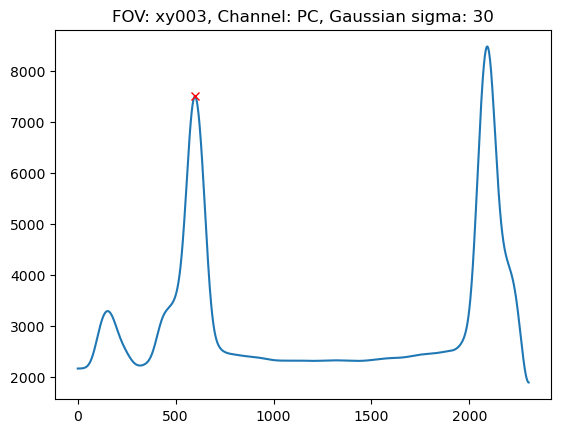

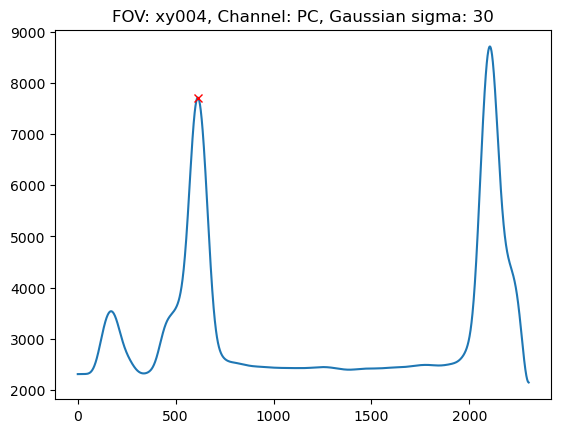

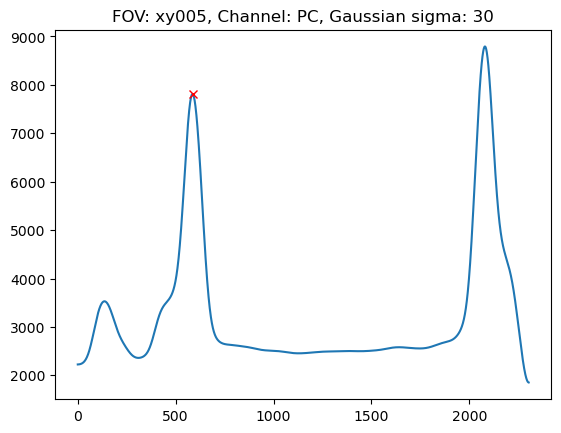

In [32]:
y_peaks = {FOV: my_experiment.find_lane_peaks(FOV, sigma=sigma, distance=distance, height=height, plot=True, y_crop=y_crop)[1] for FOV in my_experiment.FOVs}

Set the y offsets from the halo (knowing the trench length can be helpful here)

In [33]:
# you need to play with this values to get trenches in frame
# if you set trench_y_offsets = (300, 20), the extracted trench would cover 300 up from halo, 20 up from halo detected
# my_experiment.trench_y_offsets = (200, 135)
my_experiment.trench_y_offsets = (210, 110)

Check that only one y peak has been found for each FOV

In [34]:
y_peaks

{'xy000': array([617], dtype=int64),
 'xy001': array([607], dtype=int64),
 'xy002': array([593], dtype=int64),
 'xy003': array([599], dtype=int64),
 'xy004': array([613], dtype=int64),
 'xy005': array([586], dtype=int64)}

Find the y limits

In [35]:
y_peaks = my_experiment.find_all_trench_y_positions_PC(channel=my_experiment.PC_channel,sigma=sigma,distance=distance,height=height,plot=False, plot_save=True, y_crop=y_crop)

### Extract the trenches as png

In [37]:
my_experiment.extract_trenches(force=True)

PermissionError: [Errno 13] Permission denied: 'D:\\PRISM\\trenches\\xy001_PC_TR35_T0008.png'

In [4]:
print(len(os.listdir("trenches")))

70103


### Extract trenches as zarr

In [5]:
import zarr
from numcodecs import Blosc
from glob import glob
import numpy as np

n_trenches = 0
for FOV in my_experiment.FOVs:
    x_pos = my_experiment.pruned_experiment_trench_x_lims[FOV]
    n_trenches += len(x_pos)

trench_num = 0
trench_id_dict = dict()
for FOV in my_experiment.FOVs:
    y_pos = my_experiment.y_peaks[FOV][0]
    x_pos = my_experiment.pruned_experiment_trench_x_lims[FOV]
    trenches_id = []
    if type(x_pos) == dict:
        for key, value in x_pos.items():
            trenches_id.append([value, y_pos, trench_num])
            trench_num += 1
        trench_id_dict[FOV] = trenches_id
    else:
        for i, (L, R) in enumerate(x_pos):
            trenches_id.append([(L,R), y_pos, trench_num])
            trench_num += 1
        trench_id_dict[FOV] = trenches_id

if type(x_pos) == dict:
    trench_x_size = list(x_pos.values())[0][1] - list(x_pos.values())[0][0]
else:
    trench_x_size = x_pos[0][1] - x_pos[0][0]
trench_y_size = my_experiment.trench_y_offsets[0] - my_experiment.trench_y_offsets[1]
compressor = Blosc(cname='zstd', clevel=9, shuffle=Blosc.BITSHUFFLE)
z1 = zarr.open(f'{my_experiment.directory}/trenches.zarr', mode='w', shape=(n_trenches, len(my_experiment.times), len(my_experiment.channels), trench_y_size, trench_x_size),
                chunks=(1,1,1,trench_y_size, trench_x_size), dtype='uint16', compressor = compressor)


def extract_trenches_from_image(FOV, t, time, c, channel):
    image = my_experiment.get_image(FOV, channel, time, registered=my_experiment.is_registered)
    for (L, R), y_pos, tr in trench_id_dict[FOV]:
            trench = image[y_pos - my_experiment.trench_y_offsets[0]:y_pos - my_experiment.trench_y_offsets[1], L:R]
            z1[tr,t,c] = trench

a = list(product(trench_id_dict.keys(), enumerate(my_experiment.times), enumerate(my_experiment.channels)))

Parallel(n_jobs=-1)(delayed(extract_trenches_from_image)(FOV, t, time, c, channel) for FOV, (t, time), (c, channel) in tqdm(a))

NameError: name 'my_experiment' is not defined

### Visualise zarr trench image

In [43]:
my_experiment.channels

['BFP', 'PC', 'RFP']

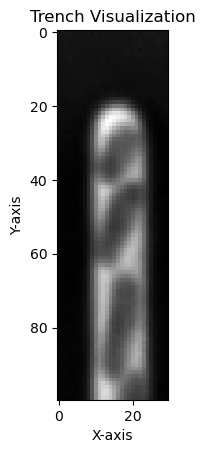

In [44]:
# Visualise one of the zarr array trenches
# Example: Visualize the first trench, first time point, and first channel
trench_data = z1[6, 0, 1]

plt.imshow(trench_data, cmap='gray')
plt.title("Trench Visualization")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()


In [ ]:
import os
import zarr
import numpy as np

# 1. Define paths and open the Zarr
basedir = os.getcwd()
zarr_path = os.path.join(basedir, 'trenches.zarr')

# Open in read+write mode
z1 = zarr.open(zarr_path, mode='r+')

# # 2. Define current vs desired channel order
# current_order = ['CFP', 'Dapi', 'PC', 'mCherry3', 'mVenus']
# desired_order = ['PC', 'CFP', 'mCherry3', 'mVenus', 'Dapi']

# # 3. Compute reorder indices
# reorder_indices = [current_order.index(ch) for ch in desired_order]

# # 4. Read and reorder the data along the channel axis (axis=2)
# #    This will create a full in-memory copy of the zarr array, so make sure you
# #    have enough RAM. If not, you can iterate chunk-by-chunk instead.
# print("Loading and reordering trenches.zarr in memory...")
# reordered = np.take(z1[:, :, :, :, :], indices=reorder_indices, axis=2)

# # 5. Write the reordered data back into the original Zarr
# print("Writing reordered data back to trenches.zarr...")
# z1[:, :, :, :, :] = reordered

# print("✔ Channel axis has been reordered to:", desired_order)


Loading and reordering trenches.zarr in memory...
Writing reordered data back to trenches.zarr...
✔ Channel axis has been reordered to: ['PC', 'CFP', 'mCherry3', 'mVenus', 'Dapi']


In [55]:
import napari

# Assuming z1 is your Zarr dataset
viewer = napari.Viewer()

# Add the Zarr data to the viewer
viewer.add_image(z1, name='Trench Data')

# Start the napari viewer
napari.run()


### Save trench zarr metadata to json files
Aim here is to create a loadable mapping from the trench zarr indices to the information which was available prior to extraction. Three json files are created. When loaded back as a dictionary, the key of the dictionary corresponds to the relevant index of the trench zarr.
* A mapping from zarr trench number -> FOV
* A mapping from zarr timepoint -> experiment time point (could be a useful record if any time points were discarded)
* A mapping from zarr channel index -> channel string

In [371]:
import json

In [372]:
# Mapping of FOV to trenchID
trench_num = 0
FOV_to_trench_dict = dict()
for FOV in my_experiment.FOVs:
    y_pos = my_experiment.y_peaks[FOV][0]
    x_pos = my_experiment.pruned_experiment_trench_x_lims[FOV]
    FOV_to_trench = []
    if type(x_pos) == dict:
        for key, value in x_pos.items():
            FOV_to_trench.append(trench_num)
            trench_num += 1
    else:
        for i, (L, R) in enumerate(x_pos):
            FOV_to_trench.append(trench_num)
            trench_num += 1
    FOV_to_trench_dict[FOV] = FOV_to_trench

In [373]:
### invert the mapping, i.e index in zarr array is a dict key which maps to experimental metadata
# mapping of trench ID to FOV
trench_to_FOV_dict = dict()
for key, value in FOV_to_trench_dict.items():
    for tr in value:
        trench_to_FOV_dict[tr] = key
trench_to_FOV_dict

{0: 'xy041',
 1: 'xy041',
 2: 'xy041',
 3: 'xy041',
 4: 'xy041',
 5: 'xy041',
 6: 'xy041',
 7: 'xy041',
 8: 'xy041',
 9: 'xy041',
 10: 'xy041',
 11: 'xy041',
 12: 'xy041',
 13: 'xy041',
 14: 'xy041',
 15: 'xy041',
 16: 'xy041',
 17: 'xy041',
 18: 'xy041',
 19: 'xy041',
 20: 'xy041',
 21: 'xy041',
 22: 'xy041',
 23: 'xy041',
 24: 'xy041',
 25: 'xy041',
 26: 'xy041',
 27: 'xy041',
 28: 'xy041',
 29: 'xy041',
 30: 'xy041',
 31: 'xy041',
 32: 'xy041',
 33: 'xy041',
 34: 'xy041',
 35: 'xy041',
 36: 'xy041',
 37: 'xy041',
 38: 'xy041',
 39: 'xy041',
 40: 'xy041',
 41: 'xy041',
 42: 'xy041',
 43: 'xy041',
 44: 'xy041',
 45: 'xy041',
 46: 'xy041',
 47: 'xy041',
 48: 'xy041',
 49: 'xy042',
 50: 'xy042',
 51: 'xy042',
 52: 'xy042',
 53: 'xy042',
 54: 'xy042',
 55: 'xy042',
 56: 'xy042',
 57: 'xy042',
 58: 'xy042',
 59: 'xy042',
 60: 'xy042',
 61: 'xy042',
 62: 'xy042',
 63: 'xy042',
 64: 'xy042',
 65: 'xy042',
 66: 'xy042',
 67: 'xy042',
 68: 'xy042',
 69: 'xy042',
 70: 'xy042',
 71: 'xy042',
 7

In [374]:
# The dictionary trench_to_FOV_dict (created above) is saved into this file as a JSON object.
# nd2_file = "Barcoding_HADA_DAPI_40x_T1_1.nd2" # could be imported from nd2 metadata json
# nd2_file = "20241023_SB8_FDAA.nd2"
# nd2_file = "HADA_W1_7_T_singledye.nd2"
# nd2_file = "Barcoding_HADA_40x_T1.nd2"
# nd2_file = "Barcoding_DAPI_40x_T1.nd2"
#nd2_file = "Barcoding_HADA_DAPI_40x_T1_1.nd2"

# nd2_file ="20241108_RADA.nd2"
# nd2_file = "20241114_Leakage.nd2"
nd2_file = "20241205_nucleoid2.nd2"
# nd2_file = "20241207_membrane.nd2"
# nd2_file = "20241208_membrane_nucleoid.nd2"

file = "metadata_trench_zarr_FOVs_" + nd2_file + ".json"
with open(file, 'w') as f: 
    json.dump(trench_to_FOV_dict, f)

In [376]:
# Saves metadata about the channels, linking channel indices to names. This is important when interpreting the Zarr data where channels might be indexed numerically.
channel_info_dict = dict()
for count, channel in enumerate(my_experiment.channels):
    channel_info_dict[str(count)] = channel
    
file = "metadata_trench_zarr_channels_" + nd2_file + ".json"
with open(file, 'w') as f: 
    json.dump(channel_info_dict, f)

In [377]:
# A mapping from zarr timepoint -> experiment time point (could be a useful record if any time points were discarded)
trench_zarr_times = dict()
times = my_experiment.times
for idx, value in enumerate(times):
    trench_zarr_times[idx] = value
    
file = "metadata_trench_zarr_times_" + nd2_file + ".json"
with open(file, 'w') as f: 
    json.dump(trench_zarr_times, f)

In [378]:
# to load in a json as a dictionary
with open(file, 'r') as f:
    test = json.load(f)
test

{'0': 'T0000'}